<a href="https://colab.research.google.com/github/omniaghazy/Machine-Learning-Algorithms/blob/main/allModelClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import GridSearchCV

In [16]:
# import all models that used in classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier


In [17]:
df = pd.read_csv('/content/diabetes (1).csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Pregnancies
Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
17      1
15      1
Name: count, dtype: int64
************


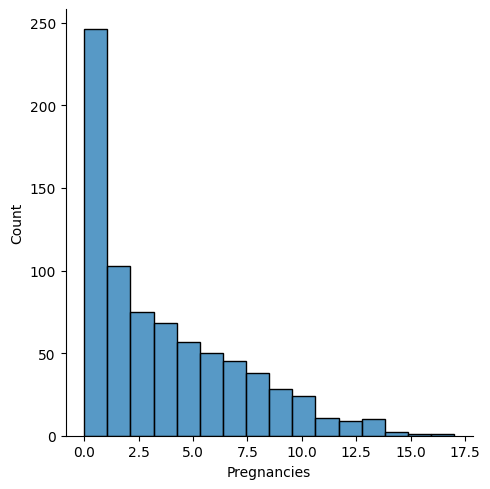



************


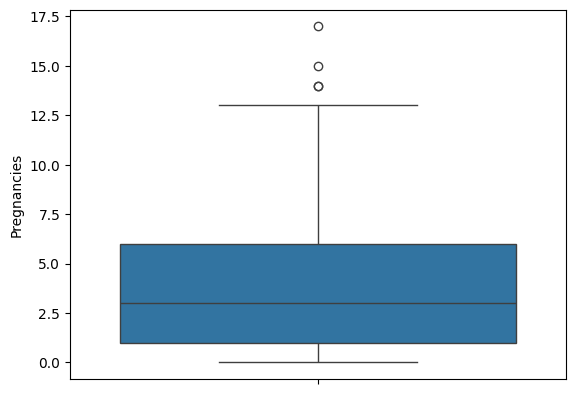

************




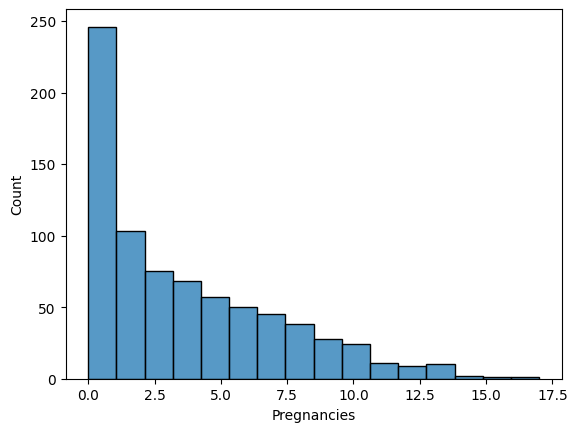

************


Glucose
Glucose
99     17
100    17
111    14
125    14
129    14
       ..
56      1
169     1
149     1
65      1
190     1
Name: count, Length: 136, dtype: int64
************


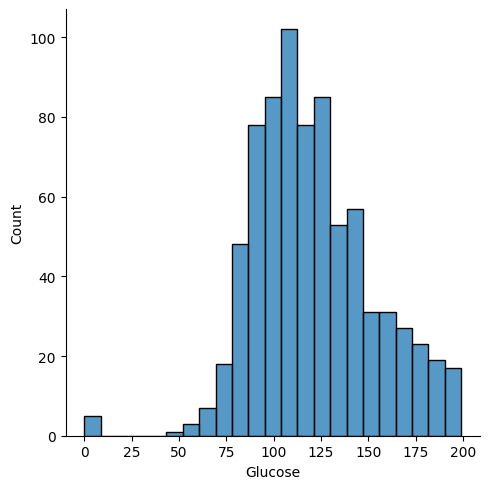



************


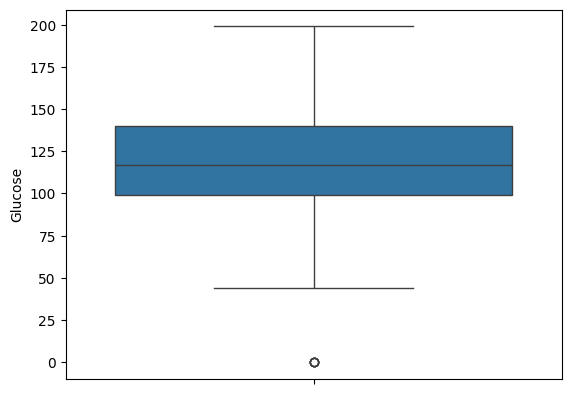

************




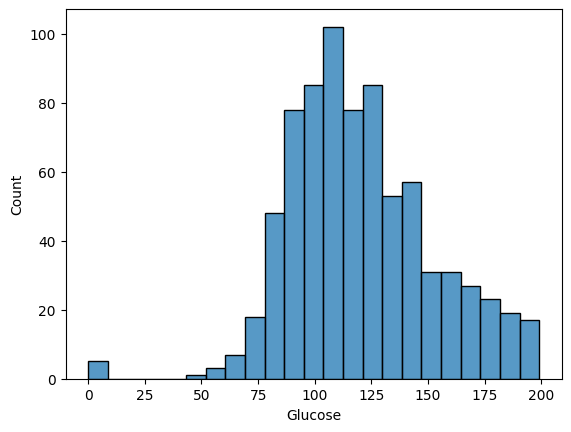

************


BloodPressure
BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
54     11
52     11
92      8
75      8
65      7
85      6
94      6
48      5
44      4
96      4
110     3
106     3
100     3
98      3
30      2
46      2
55      2
104     2
108     2
40      1
122     1
95      1
102     1
61      1
24      1
38      1
114     1
Name: count, dtype: int64
************


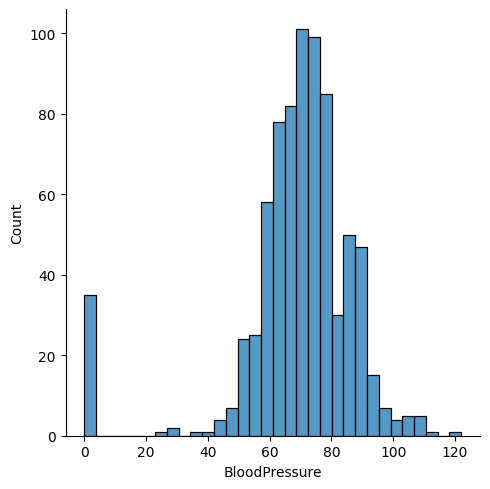



************


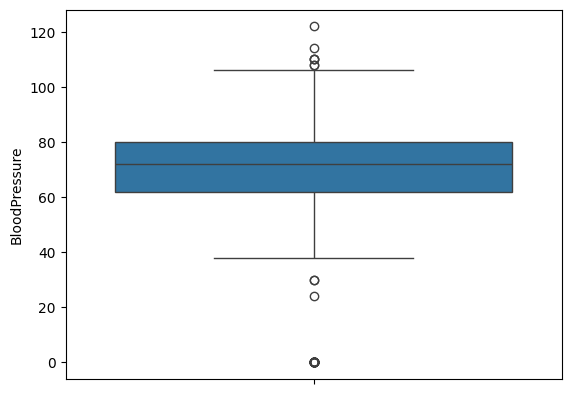

************




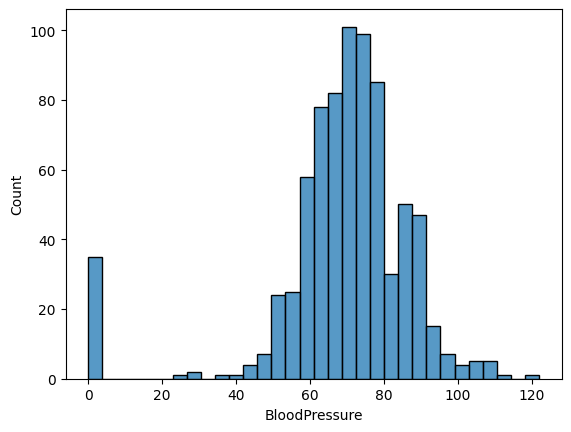

************


SkinThickness
SkinThickness
0     227
32     31
30     27
27     23
23     22
18     20
33     20
28     20
31     19
39     18
19     18
29     17
25     16
40     16
22     16
37     16
26     16
41     15
35     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
46      8
34      8
12      7
38      7
16      6
11      6
45      6
14      6
43      6
44      5
10      5
47      4
48      4
49      3
50      3
54      2
8       2
52      2
7       2
60      1
51      1
56      1
63      1
99      1
Name: count, dtype: int64
************


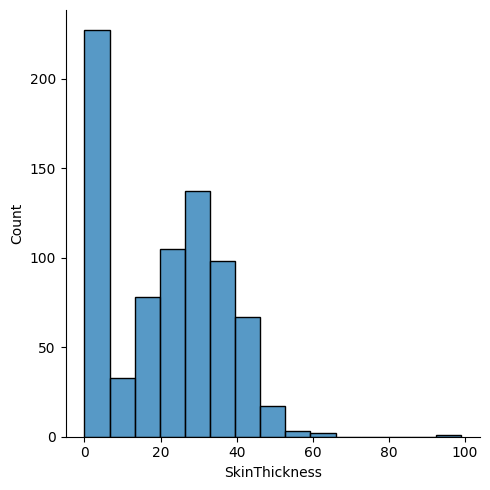



************


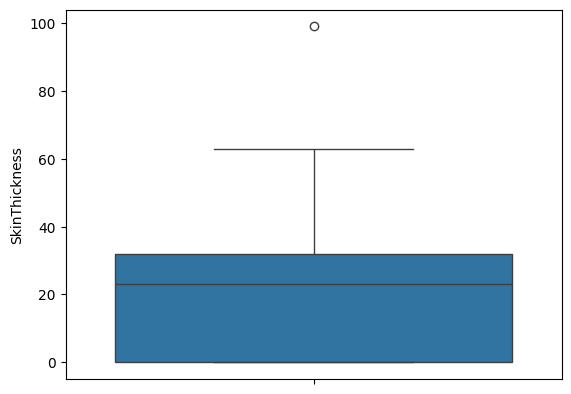

************




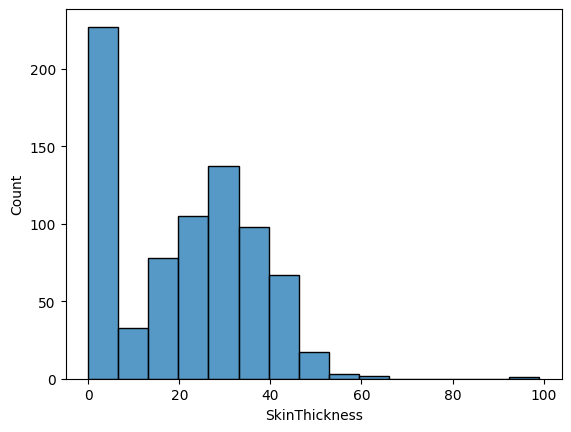

************


Insulin
Insulin
0      374
105     11
130      9
140      9
120      8
      ... 
178      1
127      1
510      1
16       1
112      1
Name: count, Length: 186, dtype: int64
************


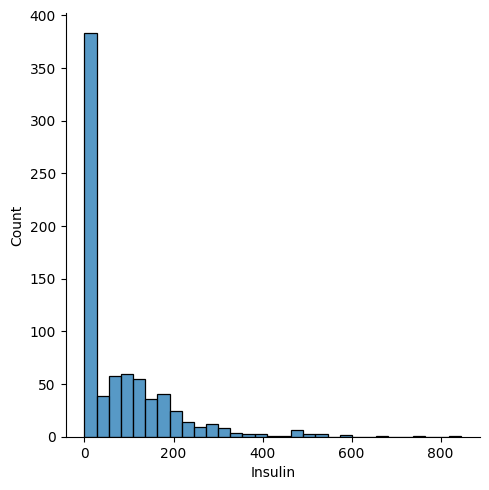



************


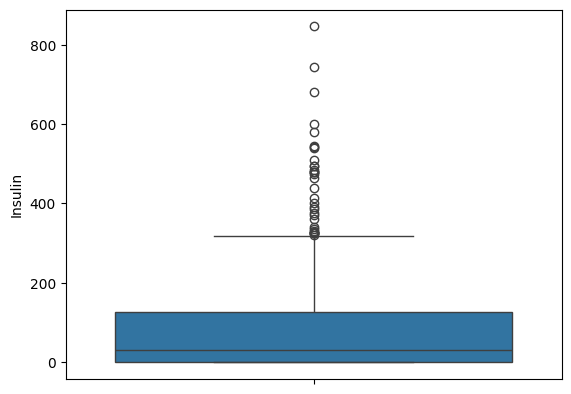

************




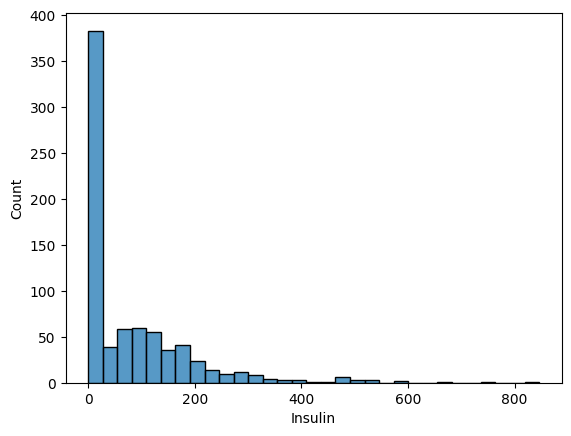

************


BMI
BMI
32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
49.6     1
24.1     1
41.2     1
49.3     1
46.3     1
Name: count, Length: 248, dtype: int64
************


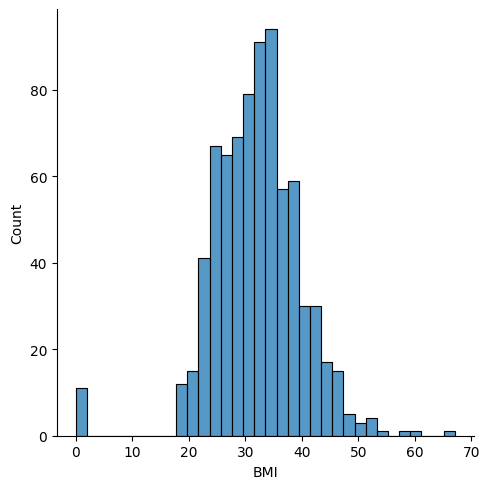



************


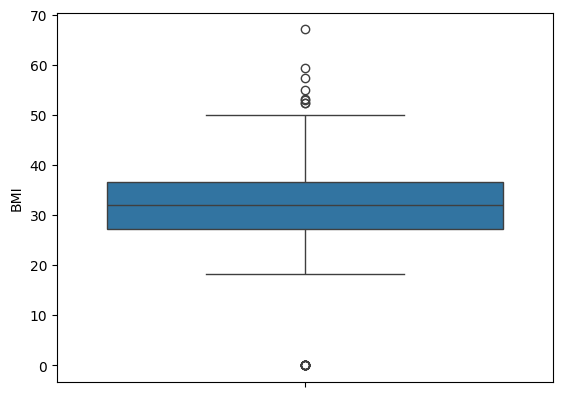

************




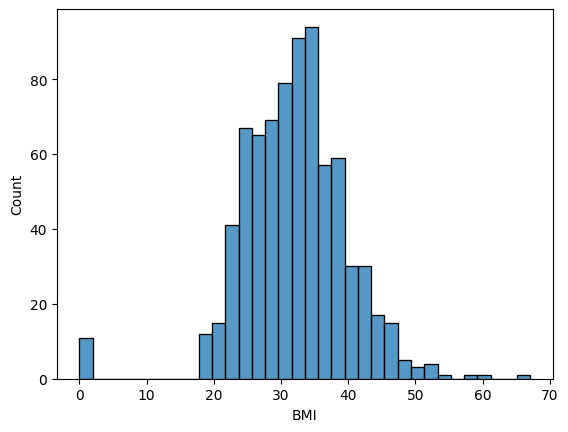

************


DiabetesPedigreeFunction
DiabetesPedigreeFunction
0.258    6
0.254    6
0.268    5
0.207    5
0.261    5
        ..
0.427    1
1.213    1
0.329    1
1.318    1
0.933    1
Name: count, Length: 517, dtype: int64
************


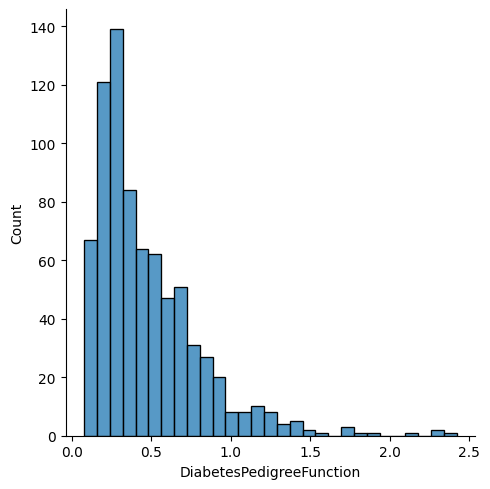



************


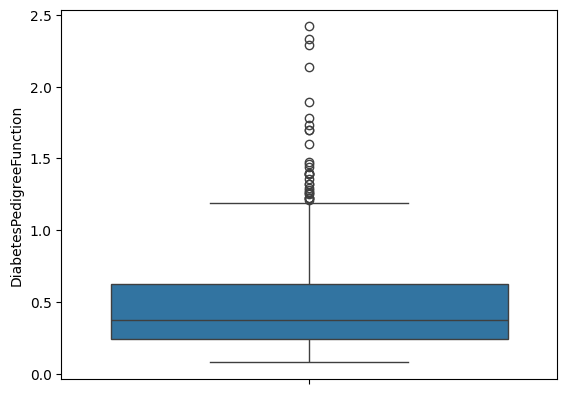

************




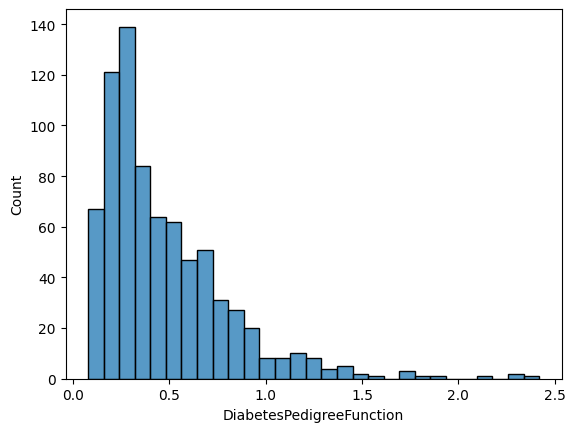

************


Age
Age
22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
36    16
38    16
32    16
45    15
34    14
46    13
40    13
43    13
39    12
35    10
44     8
50     8
51     8
52     8
58     7
54     6
47     6
49     5
60     5
53     5
57     5
48     5
63     4
66     4
55     4
62     4
59     3
56     3
65     3
67     3
61     2
69     2
72     1
81     1
64     1
70     1
68     1
Name: count, dtype: int64
************


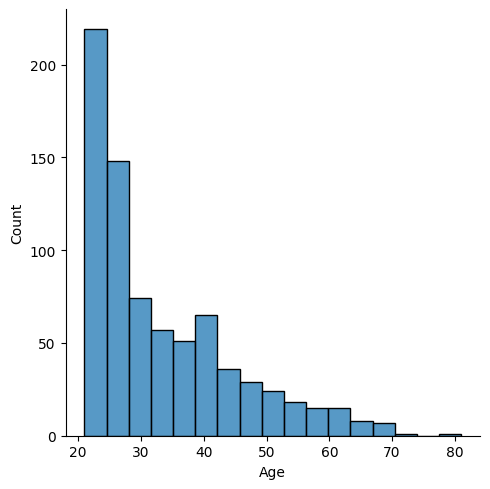



************


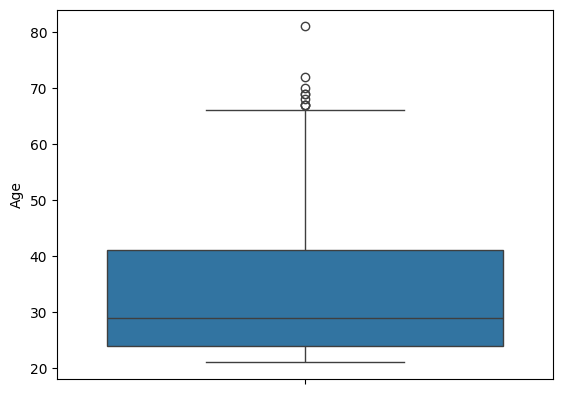

************




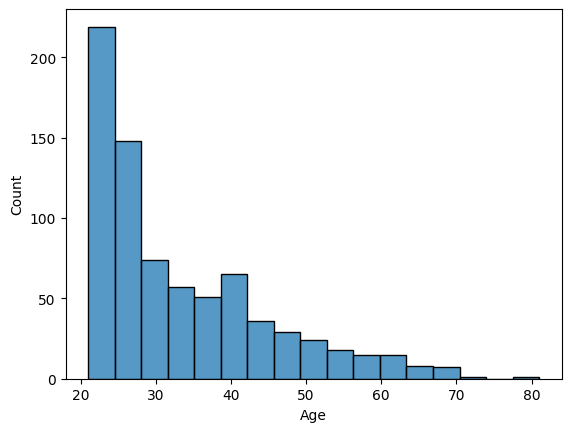

************


Outcome
Outcome
0    500
1    268
Name: count, dtype: int64
************


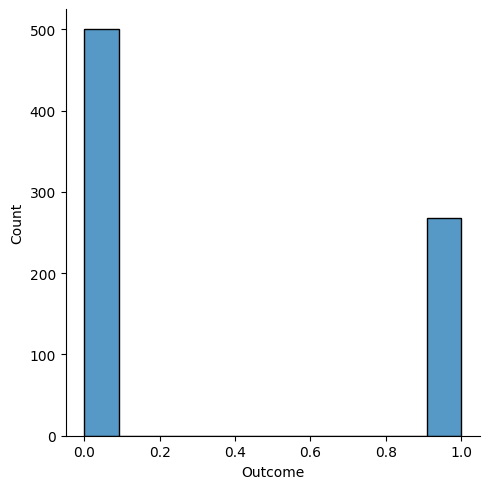



************


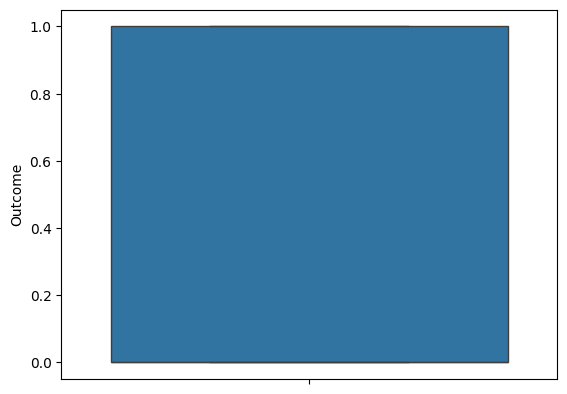

************




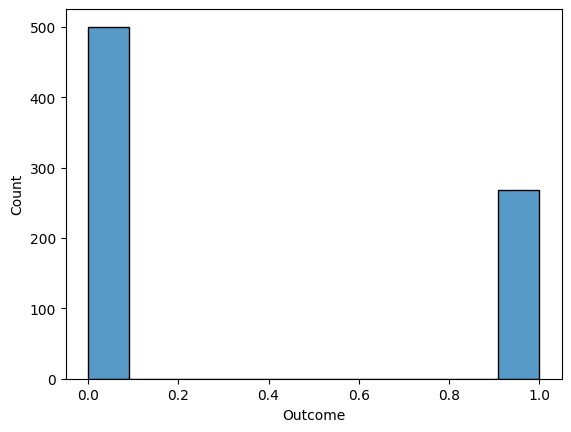

************




In [20]:
for col in df.columns:
  print(col)
  print(df[col].value_counts())
  print('*'*12)
  sns.displot(df[col])
  plt.show()
  print('\n')
  print('*'*12)
  sns.boxplot(df[col])
  plt.show()
  print('*'*12)
  print('\n')
  sns.histplot(df[col])
  plt.show()
  print('*'*12)
  print('\n')

In [21]:
# Replace 0 values with a small number before log transformation
df['Pregnancies'] = df['Pregnancies'].replace(0, 1e-9)
df['Insulin'] = df['Insulin'].replace(0, 1e-9)
df["DiabetesPedigreeFunction"] = df["DiabetesPedigreeFunction"].replace(0, 1e-9)
df['Age'] = df['Age'].replace(0, 1e-9)


df['Pregnancies'] = np.log(df['Pregnancies'])
df['Insulin'] = np.log(df['Insulin'])
df["DiabetesPedigreeFunction"] = np.log(df["DiabetesPedigreeFunction"])
df['Age'] = np.log(df['Age'])

Pregnancies
Pregnancies
 0.000000     135
-20.723266    111
 0.693147     103
 1.098612      75
 1.386294      68
 1.609438      57
 1.791759      50
 1.945910      45
 2.079442      38
 2.197225      28
 2.302585      24
 2.397895      11
 2.564949      10
 2.484907       9
 2.639057       2
 2.833213       1
 2.708050       1
Name: count, dtype: int64
************


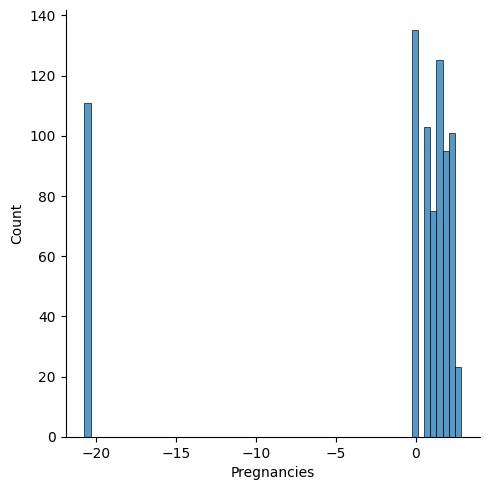



************


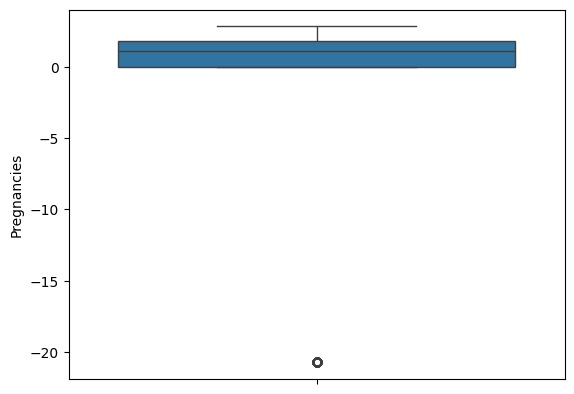

************




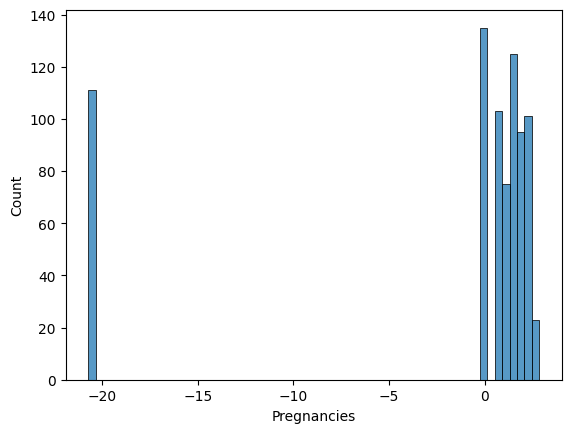

************


Glucose
Glucose
99     17
100    17
111    14
125    14
129    14
       ..
56      1
169     1
149     1
65      1
190     1
Name: count, Length: 136, dtype: int64
************


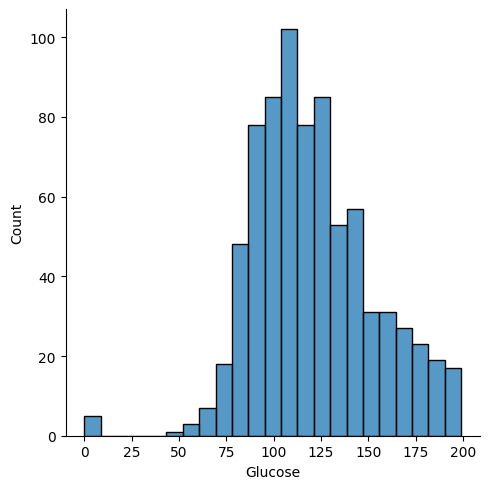



************


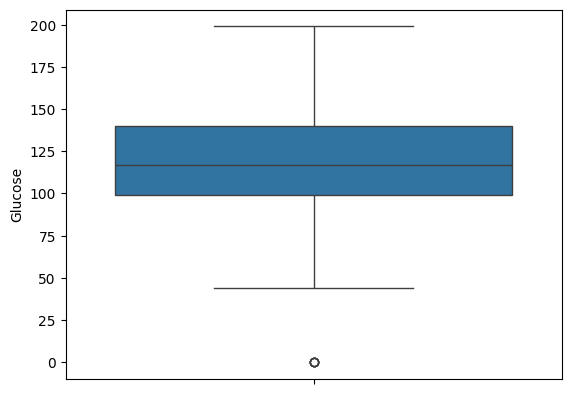

************




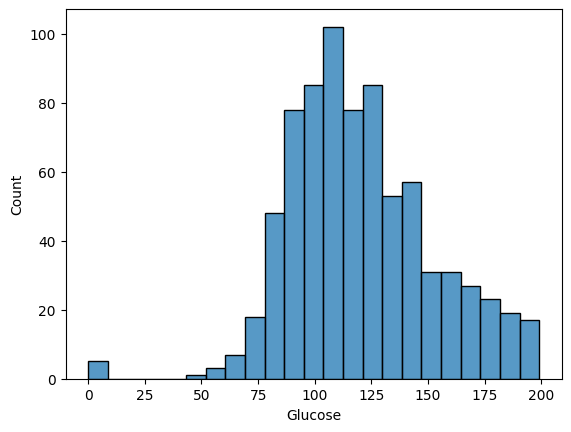

************


BloodPressure
BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
54     11
52     11
92      8
75      8
65      7
85      6
94      6
48      5
44      4
96      4
110     3
106     3
100     3
98      3
30      2
46      2
55      2
104     2
108     2
40      1
122     1
95      1
102     1
61      1
24      1
38      1
114     1
Name: count, dtype: int64
************


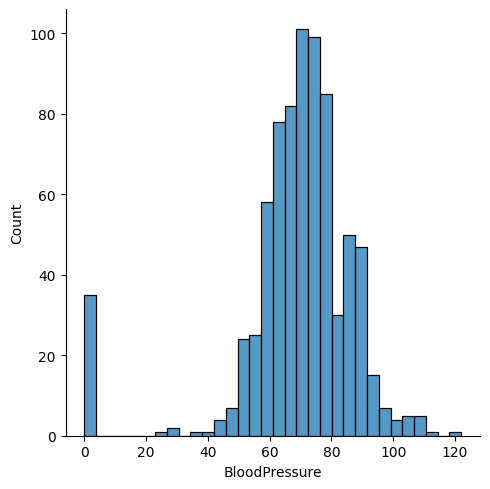



************


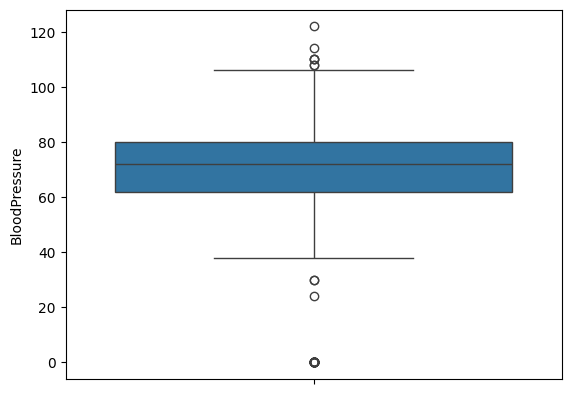

************




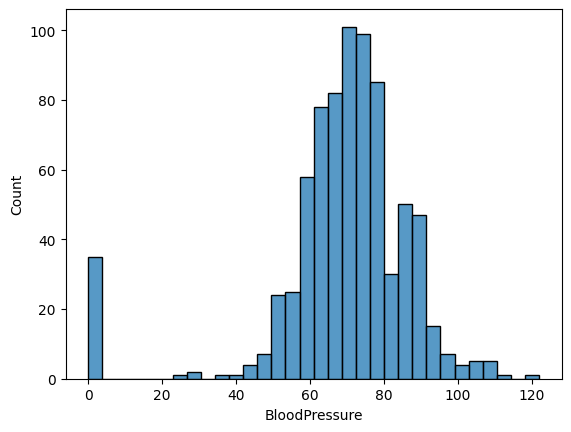

************


SkinThickness
SkinThickness
0     227
32     31
30     27
27     23
23     22
18     20
33     20
28     20
31     19
39     18
19     18
29     17
25     16
40     16
22     16
37     16
26     16
41     15
35     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
46      8
34      8
12      7
38      7
16      6
11      6
45      6
14      6
43      6
44      5
10      5
47      4
48      4
49      3
50      3
54      2
8       2
52      2
7       2
60      1
51      1
56      1
63      1
99      1
Name: count, dtype: int64
************


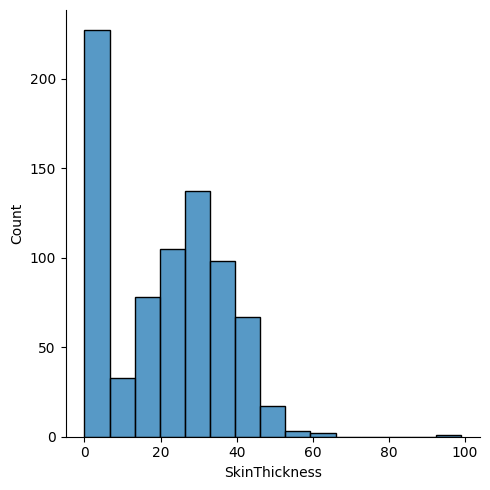



************


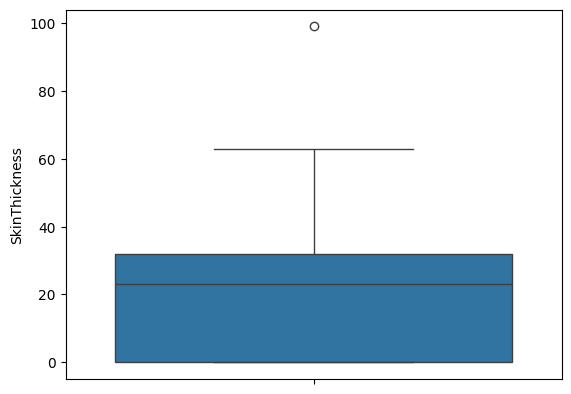

************




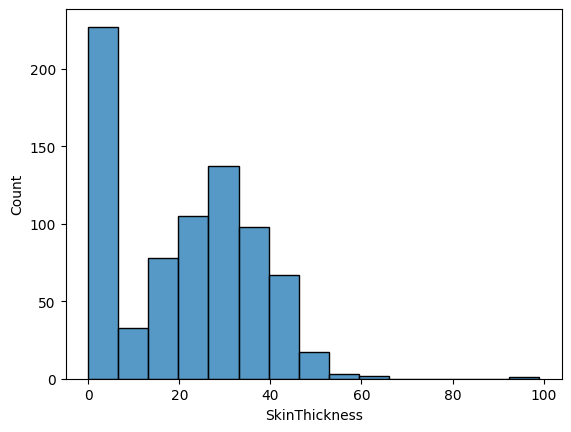

************


Insulin
Insulin
-20.723266    374
 4.653960      11
 4.867534       9
 4.941642       9
 4.787492       8
             ... 
 5.181784       1
 4.844187       1
 6.234411       1
 2.772589       1
 4.718499       1
Name: count, Length: 186, dtype: int64
************


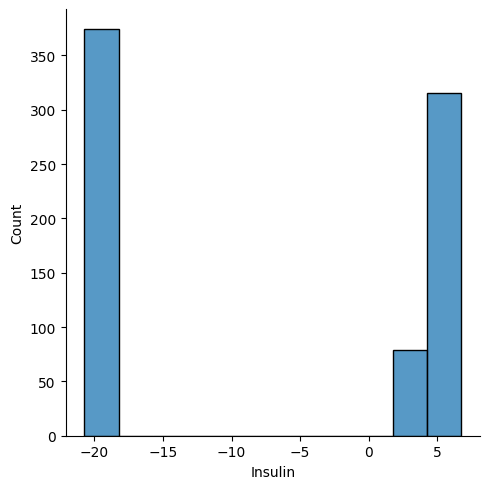



************


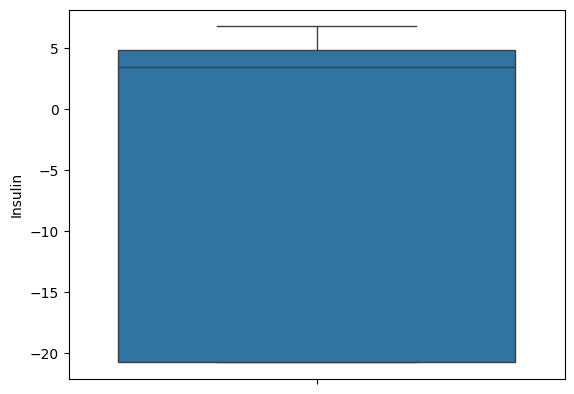

************




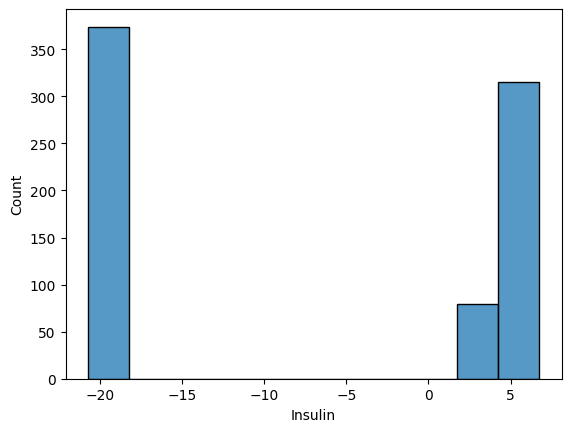

************


BMI
BMI
32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
49.6     1
24.1     1
41.2     1
49.3     1
46.3     1
Name: count, Length: 248, dtype: int64
************


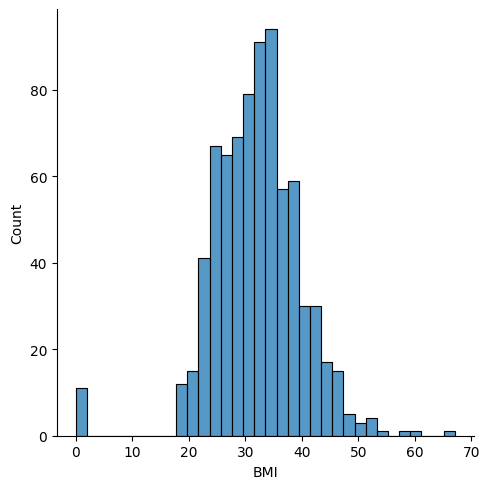



************


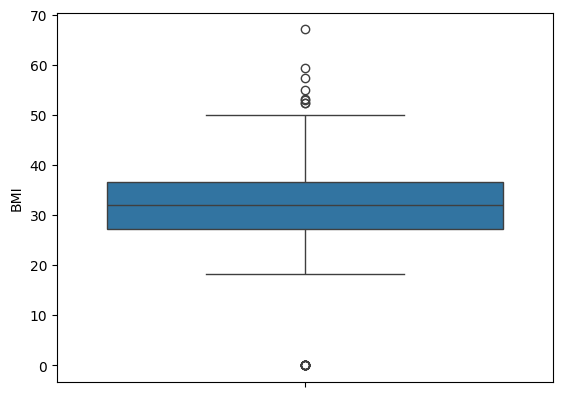

************




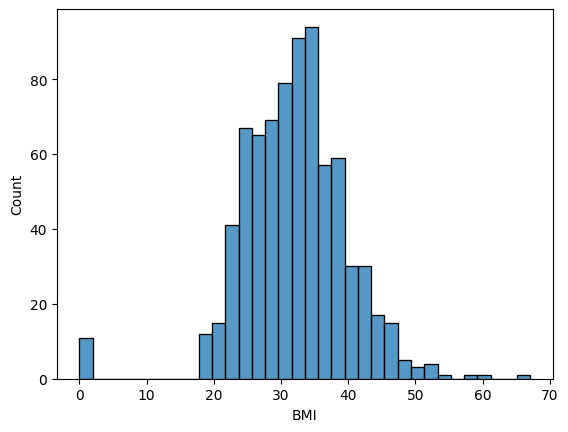

************


DiabetesPedigreeFunction
DiabetesPedigreeFunction
-1.354796    6
-1.370421    6
-1.316768    5
-1.575036    5
-1.343235    5
            ..
-0.850971    1
 0.193097    1
-1.111698    1
 0.276115    1
-0.069350    1
Name: count, Length: 517, dtype: int64
************


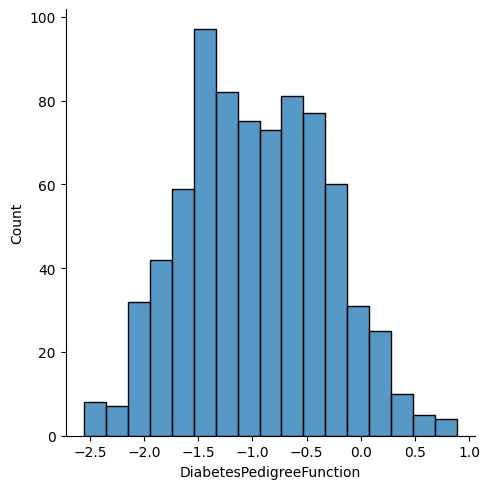



************


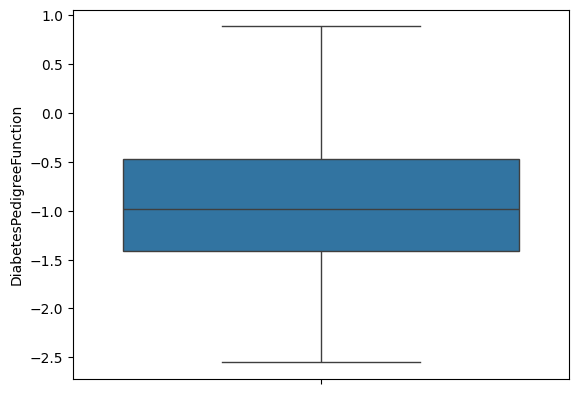

************




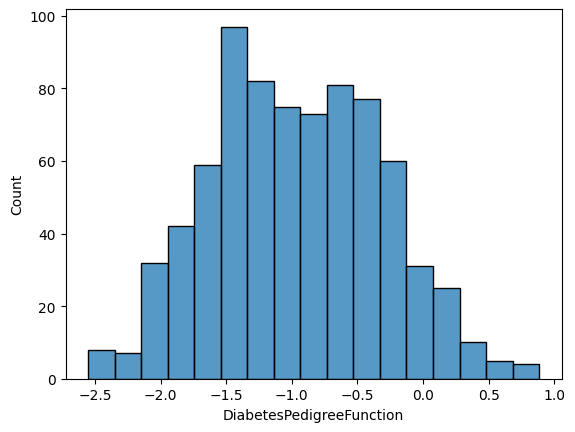

************


Age
Age
3.091042    72
3.044522    63
3.218876    48
3.178054    46
3.135494    38
3.332205    35
3.258097    33
3.295837    32
3.367296    29
3.433987    24
3.713572    22
3.401197    21
3.610918    19
3.737670    18
3.496508    17
3.583519    16
3.637586    16
3.465736    16
3.806662    15
3.526361    14
3.828641    13
3.688879    13
3.761200    13
3.663562    12
3.555348    10
3.784190     8
3.912023     8
3.931826     8
3.951244     8
4.060443     7
3.988984     6
3.850148     6
3.891820     5
4.094345     5
3.970292     5
4.043051     5
3.871201     5
4.143135     4
4.189655     4
4.007333     4
4.127134     4
4.077537     3
4.025352     3
4.174387     3
4.204693     3
4.110874     2
4.234107     2
4.276666     1
4.394449     1
4.158883     1
4.248495     1
4.219508     1
Name: count, dtype: int64
************


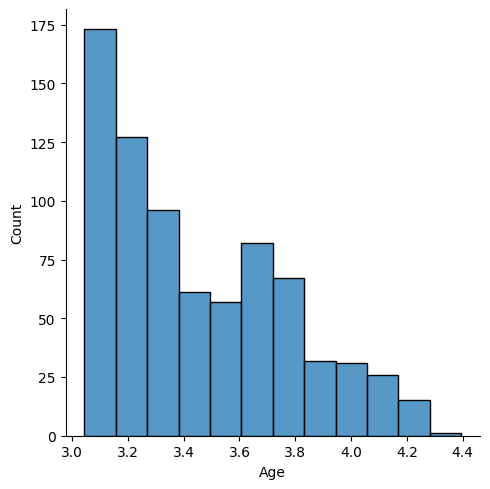



************


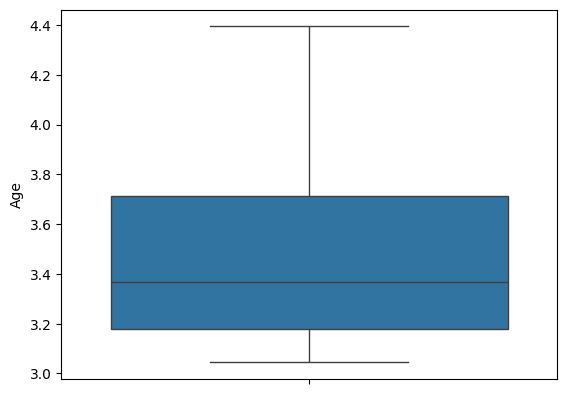

************




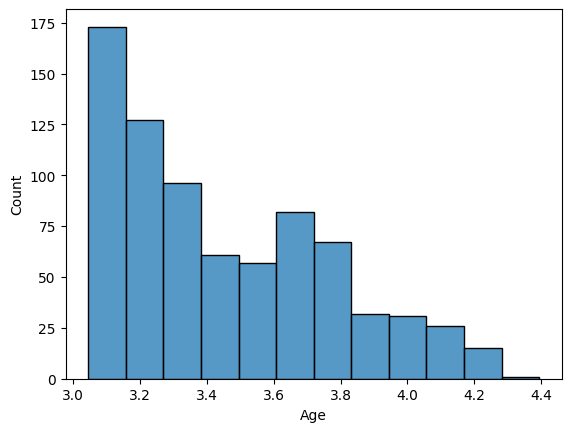

************


Outcome
Outcome
0    500
1    268
Name: count, dtype: int64
************


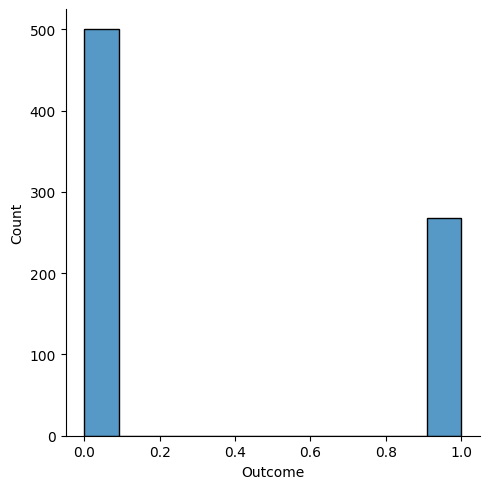



************


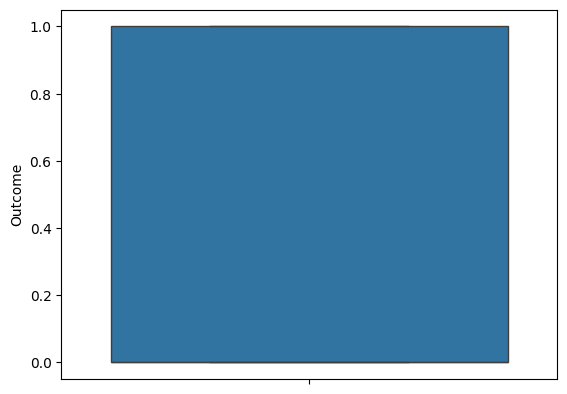

************




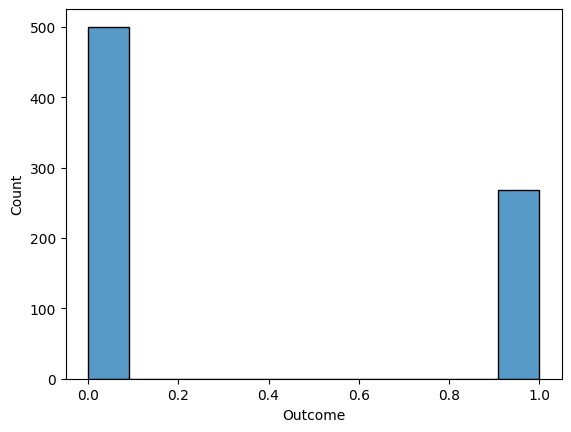

************




In [22]:
for col in df.columns:
  print(col)
  print(df[col].value_counts())
  print('*'*12)
  sns.displot(df[col])
  plt.show()
  print('\n')
  print('*'*12)
  sns.boxplot(df[col])
  plt.show()
  print('*'*12)
  print('\n')
  sns.histplot(df[col])
  plt.show()
  print('*'*12)
  print('\n')

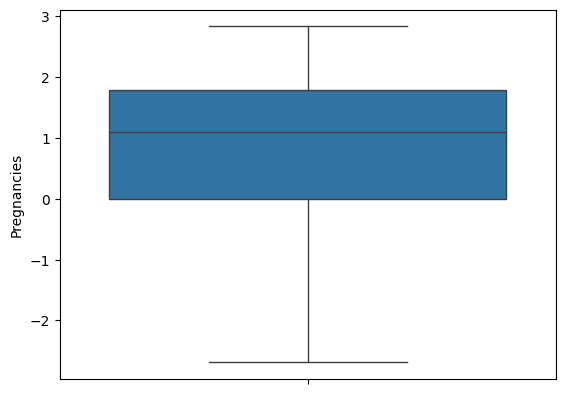

************




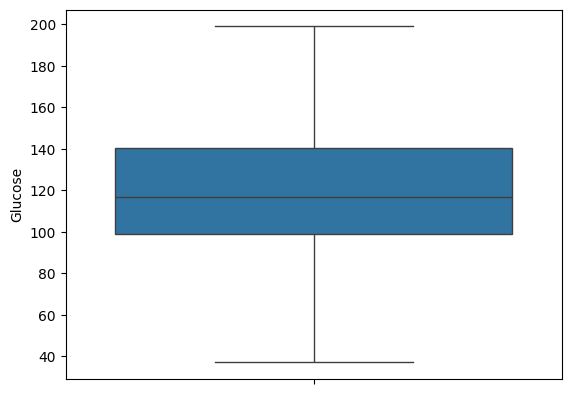

************




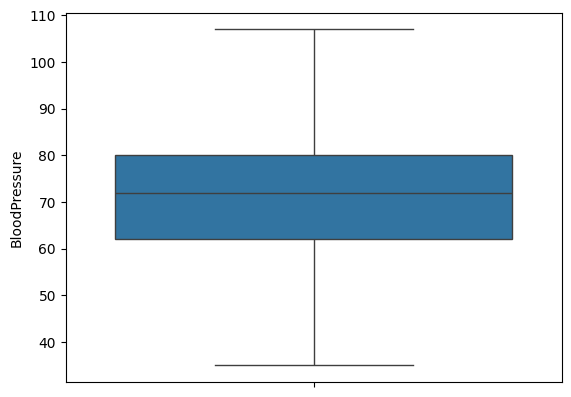

************




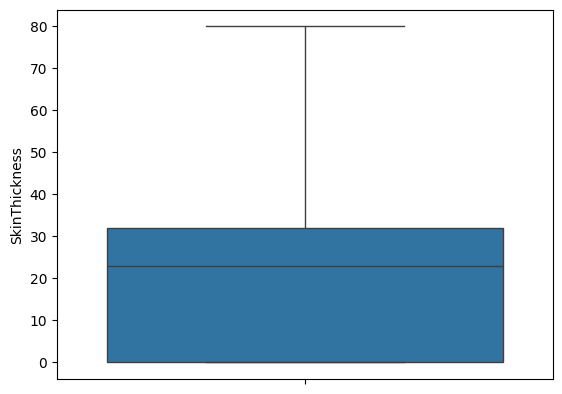

************




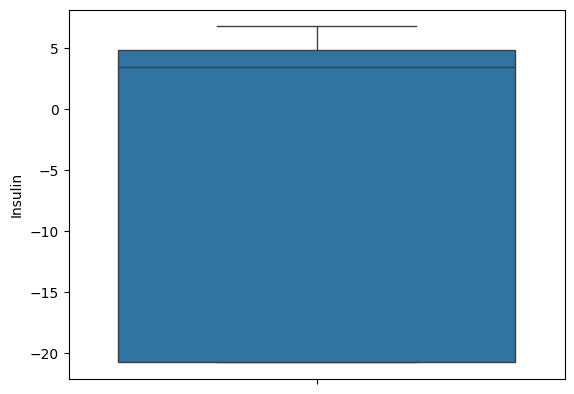

************




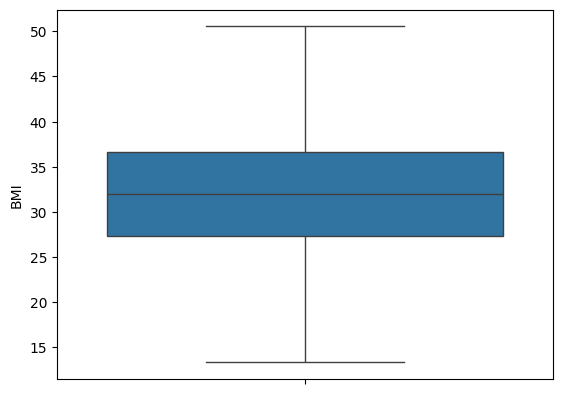

************




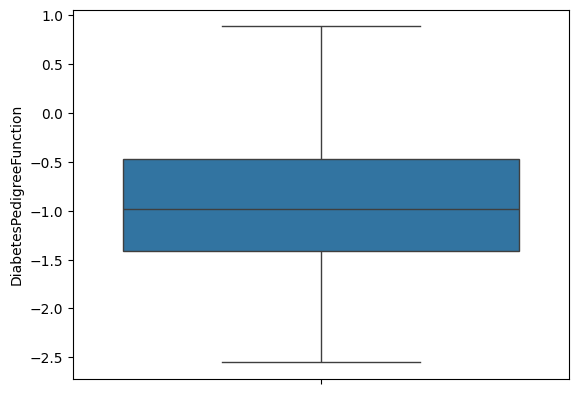

************




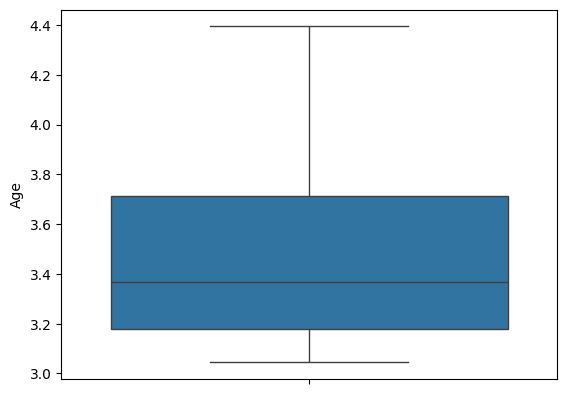

************




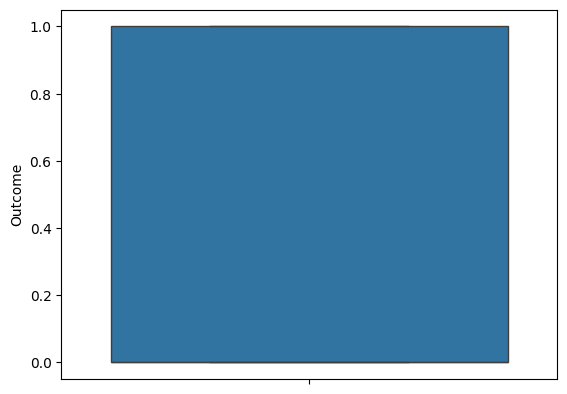

************




In [23]:
for col in df :
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  upper = Q3 + 1.5 * IQR
  lower = Q1 - 1.5 * IQR
  df[col] = np.where(df[col] > upper,upper,df[col])
  df[col] = np.where(df[col] < lower,lower,df[col])
  sns.boxplot(df[col])
  plt.show()
  print('*'*12)
  print('\n')

In [24]:
LogisticRegression = LogisticRegression()
KNeighborsClassifier = KNeighborsClassifier()
DecisionTreeClassifier = DecisionTreeClassifier()
RandomForestClassifier = RandomForestClassifier()
GaussianNB = GaussianNB()
SVC = SVC()
XGBClassifier = XGBClassifier()

In [25]:
from imblearn.over_sampling import SMOTE
x = df.drop('Outcome',axis=1)
y = df['Outcome']
smote=SMOTE(sampling_strategy='minority')
x,y=smote.fit_resample(x,y)
y.value_counts()

,count
Outcome,
1.0,500
0.0,500


In [26]:
from sklearn.impute import SimpleImputer

# Replace infinite values with NaN
df_imputed = df.replace([np.inf, -np.inf], np.nan)

# Impute missing values with the median
imputer = SimpleImputer(strategy='median')
df_imputed = imputer.fit_transform(df_imputed)

# Convert back to DataFrame for easier handling
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

x = df_imputed.drop('Outcome',axis=1)
y = df_imputed['Outcome']

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1000)


In [28]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.impute import SimpleImputer

# Replace infinite values with NaN
x_train = x_train.replace([np.inf, -np.inf], np.nan)
x_test = x_test.replace([np.inf, -np.inf], np.nan)

# Impute missing values with the median
imputer = SimpleImputer(strategy='median')
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

# Apply MaxAbsScaler
scaler = MaxAbsScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [29]:
LogisticRegression.fit(x_train,y_train)
KNeighborsClassifier.fit(x_train,y_train)
DecisionTreeClassifier.fit(x_train,y_train)
RandomForestClassifier.fit(x_train,y_train)
GaussianNB.fit(x_train,y_train)
SVC.fit(x_train,y_train)
XGBClassifier.fit(x_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

LogisticRegression_acc :  0.7597402597402597
KNeighborsClassifier_acc :  0.6688311688311688
DecisionTreeClassifier_acc :  0.7207792207792207
RandomForestClassifier_acc :  0.7467532467532467
GaussianNB_acc :  0.7727272727272727
SVC_acc :  0.7467532467532467
XGBClassifier_acc :  0.7662337662337663
LogisticRegression_cm :  [[92 10]
 [27 25]]
KNeighborsClassifier_cm :  [[79 23]
 [28 24]]
DecisionTreeClassifier_cm :  [[85 17]
 [26 26]]
RandomForestClassifier_cm :  [[85 17]
 [22 30]]
GaussianNB_cm :  [[89 13]
 [22 30]]
SVC_cm :  [[91 11]
 [28 24]]
XGBClassifier_cm :  [[85 17]
 [19 33]]


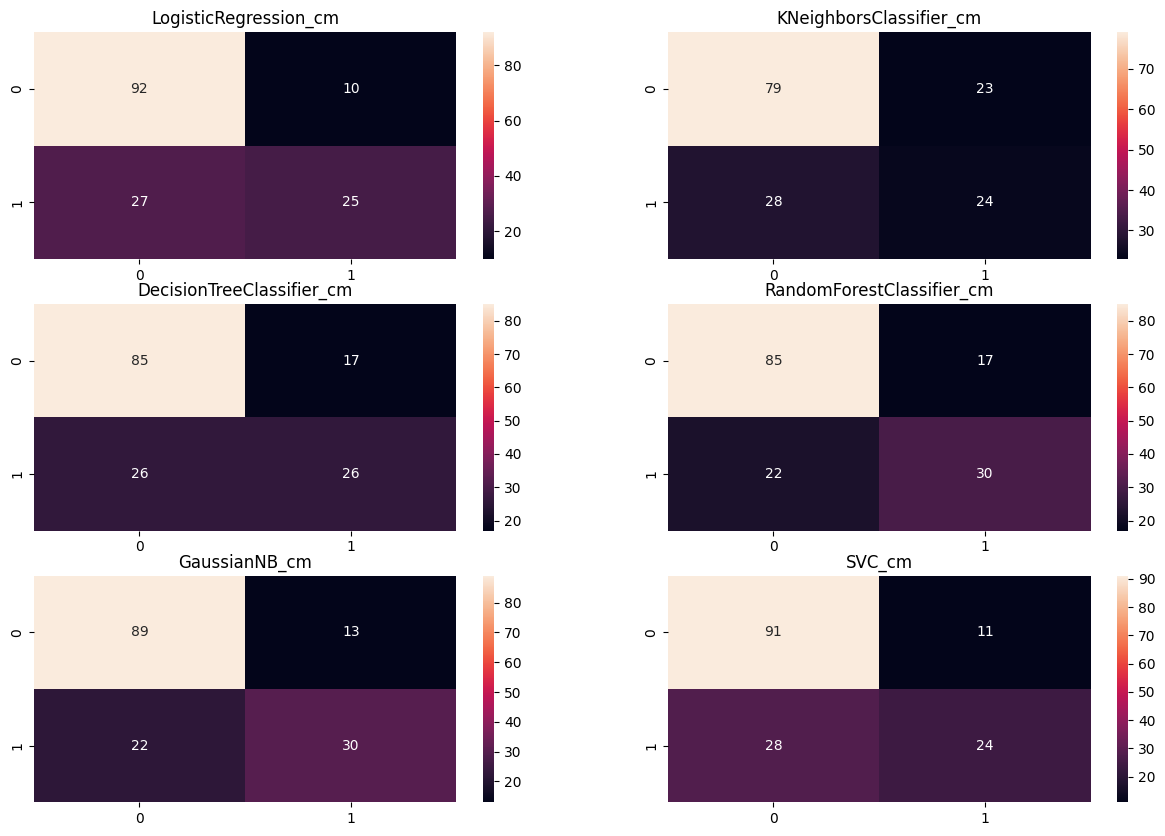

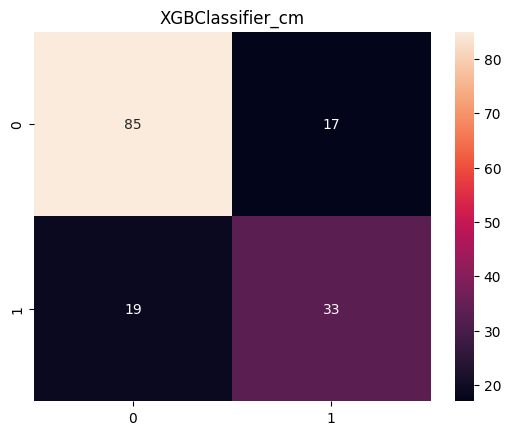

LogisticRegression_cr :                precision    recall  f1-score   support

         0.0       0.77      0.90      0.83       102
         1.0       0.71      0.48      0.57        52

    accuracy                           0.76       154
   macro avg       0.74      0.69      0.70       154
weighted avg       0.75      0.76      0.75       154

KNeighborsClassifier_cr :                precision    recall  f1-score   support

         0.0       0.74      0.77      0.76       102
         1.0       0.51      0.46      0.48        52

    accuracy                           0.67       154
   macro avg       0.62      0.62      0.62       154
weighted avg       0.66      0.67      0.66       154

DecisionTreeClassifier_cr :                precision    recall  f1-score   support

         0.0       0.77      0.83      0.80       102
         1.0       0.60      0.50      0.55        52

    accuracy                           0.72       154
   macro avg       0.69      0.67      0.67    

In [30]:
LogisticRegression_pred = LogisticRegression.predict(x_test)
KNeighborsClassifier_pred = KNeighborsClassifier.predict(x_test)
DecisionTreeClassifier_pred = DecisionTreeClassifier.predict(x_test)
RandomForestClassifier_pred = RandomForestClassifier.predict(x_test)
GaussianNB_pred = GaussianNB.predict(x_test)
SVC_pred = SVC.predict(x_test)
XGBClassifier_pred = XGBClassifier.predict(x_test)



from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
LogisticRegression_acc = accuracy_score(y_test,LogisticRegression_pred)
KNeighborsClassifier_acc = accuracy_score(y_test,KNeighborsClassifier_pred)
DecisionTreeClassifier_acc = accuracy_score(y_test,DecisionTreeClassifier_pred)
RandomForestClassifier_acc = accuracy_score(y_test,RandomForestClassifier_pred)
GaussianNB_acc = accuracy_score(y_test,GaussianNB_pred)
SVC_acc = accuracy_score(y_test,SVC_pred)
XGBClassifier_acc = accuracy_score(y_test,XGBClassifier_pred)

# CONFUSION MATRIx
LogisticRegression_cm = confusion_matrix(y_test,LogisticRegression_pred)
KNeighborsClassifier_cm = confusion_matrix(y_test,KNeighborsClassifier_pred)
DecisionTreeClassifier_cm = confusion_matrix(y_test,DecisionTreeClassifier_pred)
RandomForestClassifier_cm = confusion_matrix(y_test,RandomForestClassifier_pred)
GaussianNB_cm = confusion_matrix(y_test,GaussianNB_pred)
SVC_cm = confusion_matrix(y_test,SVC_pred)
XGBClassifier_cm = confusion_matrix(y_test,XGBClassifier_pred)

print('LogisticRegression_acc : ',LogisticRegression_acc)
print("KNeighborsClassifier_acc : " ,KNeighborsClassifier_acc )
print("DecisionTreeClassifier_acc : " ,DecisionTreeClassifier_acc )
print("RandomForestClassifier_acc : " ,RandomForestClassifier_acc )
print("GaussianNB_acc : " ,GaussianNB_acc )
print("SVC_acc : " ,SVC_acc )
print("XGBClassifier_acc : " ,XGBClassifier_acc )



print("==============================================")

print('LogisticRegression_cm : ',LogisticRegression_cm)
print("KNeighborsClassifier_cm : " ,KNeighborsClassifier_cm )
print("DecisionTreeClassifier_cm : " ,DecisionTreeClassifier_cm )
print("RandomForestClassifier_cm : " ,RandomForestClassifier_cm )
print("GaussianNB_cm : " ,GaussianNB_cm )
print("SVC_cm : " ,SVC_cm )
print("XGBClassifier_cm : " ,XGBClassifier_cm )

# plot confusion matrix
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
sns.heatmap(LogisticRegression_cm,annot=True,fmt='d')
plt.title('LogisticRegression_cm')
plt.subplot(3,2,2)
sns.heatmap(KNeighborsClassifier_cm,annot=True,fmt='d')
plt.title('KNeighborsClassifier_cm')
plt.subplot(3,2,3)
sns.heatmap(DecisionTreeClassifier_cm,annot=True,fmt='d')
plt.title('DecisionTreeClassifier_cm')
plt.subplot(3,2,4)
sns.heatmap(RandomForestClassifier_cm,annot=True,fmt='d')
plt.title('RandomForestClassifier_cm')
plt.subplot(3,2,5)
sns.heatmap(GaussianNB_cm,annot=True,fmt='d')
plt.title('GaussianNB_cm')
plt.subplot(3,2,6)
sns.heatmap(SVC_cm,annot=True,fmt='d')
plt.title('SVC_cm')
plt.show()

sns.heatmap(XGBClassifier_cm,annot=True,fmt='d')
plt.title('XGBClassifier_cm')
plt.show()


#classification report
print('LogisticRegression_cr : ',classification_report(y_test,LogisticRegression_pred))
print("KNeighborsClassifier_cr : " ,classification_report(y_test,KNeighborsClassifier_pred) )
print("DecisionTreeClassifier_cr : " ,classification_report(y_test,DecisionTreeClassifier_pred) )
print("RandomForestClassifier_cr : " ,classification_report(y_test,RandomForestClassifier_pred) )
print("GaussianNB_cr : " ,classification_report(y_test,GaussianNB_pred) )
print("SVC_cr : " ,classification_report(y_test,SVC_pred) )
print("XGBClassifier_cr : " ,classification_report(y_test,XGBClassifier_pred) )




In [31]:
# Grid search for all model

logistic_regression_grid ={
    'C':[0.001,0.01,0.1,1,10,100,1000],
    'penalty':['l1','l2','elasticnet','none'],
}
kneighbors_grid = {
    'n_neighbors':[1,2,3,4,5,6,7,8,9,10],
    'weights':['uniform','distance'],
    'algorithm':['auto','ball_tree','kd_tree','brute'],
}
decision_tree_grid = {
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10],
    'min_samples_split':[2,3,4,5,6,7,8,9,10],
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
    'max_features':['auto','sqrt','log2'],
    'max_leaf_nodes':[1,2,3,4,5,6,7,8,9,10],
    'min_impurity_decrease':[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
}
random_forest_grid = {
    'n_estimators':[10,20,30,40,50,60,70,80,90,100],
    'criterion':['gini','entropy','log_loss'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10],
    'min_samples_split':[2,3,4,5,6,7,8,9,10],
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
    'max_features':['auto','sqrt','log2'],
    'max_leaf_nodes':[1,2,3,4,5,6,7,8,9,10],
    'min_impurity_decrease':[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
}
gaussian_nb_grid = {
    'var_smoothing':[1e-09,1e-08,1e-07,1e-06,1e-05,1e-04,1e-03,1e-02,1e-01,1,10,100],
    'priors':[[0.5,0.5],[0.6,0.4],[0.7,0.3],[0.8,0.2],[0.9,0.1]],
}
svc_grid = {
    'C':[0.001,0.01,0.1,1,10,
         100,1000],
    'kernel':['linear','poly','rbf','sigmoid'],
    'degree':[1,2,3,4,5,6,7,8,9,10],
    'gamma':['scale','auto'],
    'coef0':[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
    'shrinking':[True,False],
    'probability':[True,False],
    'tol':[0.001,0.01,0.1,1,

    ]
}
xgb_grid = {
    'n_estimators':[10,20,30,40,50,60,70,80,90,
    ]
    ,'learning_rate':[0.001,0.01,0.1,1,10,100],
    'max_depth':[1,2,3,4,5,6,7,8,9,10],
    'min_child_weight':[1,2,3,4,5,6,7,8,9,10],
    'gamma':[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
    'subsample':[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,
    ]}


In [33]:
LogisticRegression_grid_search = GridSearchCV(LogisticRegression,logistic_regression_grid,cv=10)
KNeighborsClassifier_grid_search = GridSearchCV(KNeighborsClassifier,kneighbors_grid,cv=10)
DecisionTreeClassifier_grid_search = GridSearchCV(DecisionTreeClassifier,decision_tree_grid,cv=10)
RandomForestClassifier_grid_search = GridSearchCV(RandomForestClassifier,random_forest_grid,cv=10)
GaussianNB_grid_search = GridSearchCV(GaussianNB,gaussian_nb_grid,cv=10)
SVC_grid_search = GridSearchCV(SVC,svc_grid,cv=10)
XGBClassifier_grid_search = GridSearchCV(XGBClassifier,xgb_grid,cv=10)


In [ ]:

LogisticRegression_grid_search.fit(x_train,y_train)
KNeighborsClassifier_grid_search.fit(x_train,y_train)
DecisionTreeClassifier_grid_search.fit(x_train,y_train)
RandomForestClassifier_grid_search.fit(x_train,y_train)
GaussianNB_grid_search.fit(x_train,y_train)
SVC_grid_search.fit(x_train,y_train)
XGBClassifier_grid_search.fit(x_train,y_train)

LogisticRegression_grid_search_pred = LogisticRegression_grid_search.predict(x_test)
KNeighborsClassifier_grid_search_pred = KNeighborsClassifier_grid_search.predict(x_test)
DecisionTreeClassifier_grid_search_pred = DecisionTreeClassifier_grid_search.predict(x_test)
RandomForestClassifier_grid_search_pred = RandomForestClassifier_grid_search.predict(x_test)
GaussianNB_grid_search_pred = GaussianNB_grid_search.predict(x_test)
SVC_grid_search_pred = SVC_grid_search.predict(x_test)
XGBClassifier_grid_search_pred = XGBClassifier_grid_search.predict(x_test)




/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
210 fits failed out of a total of 280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solv

In [ ]:
print('LogisticRegression_grid_search : ',LogisticRegression_grid_search.best_params_)
print("KNeighborsClassifier_grid_search : " ,KNeighborsClassifier_grid_search.best_params_ )
print("DecisionTreeClassifier_grid_search : " ,DecisionTreeClassifier_grid_search.best_params_ )
print("RandomForestClassifier_grid_search : " ,RandomForestClassifier_grid_search.best_params_ )
print("GaussianNB_grid_search : " ,GaussianNB_grid_search.best_params_ )
print("SVC_grid_search : " ,SVC_grid_search.best_params_ )
print("XGBClassifier_grid_search : " ,XGBClassifier_grid_search.best_params_ )


In [ ]:
print('LogisticRegression_grid_search_pred : ',accuracy_score(y_test,LogisticRegression_grid_search_pred))
print('KNeighborsClassifier_grid_search_pred : ',accuracy_score(y_test,KNeighborsClassifier_grid_search_pred))
print('DecisionTreeClassifier_grid_search_pred : ',accuracy_score(y_test,DecisionTreeClassifier_grid_search_pred))
print('RandomForestClassifier_grid_search_pred : ',accuracy_score(y_test,RandomForestClassifier_grid_search_pred))
print('GaussianNB_grid_search_pred : ',accuracy_score(y_test,GaussianNB_grid_search_pred))
print('SVC_grid_search_pred : ',accuracy_score(y_test,SVC_grid_search_pred))
print('XGBClassifier_grid_search_pred : ',accuracy_score(y_test,XGBClassifier_grid_search_pred))


LogisticRegression_grid_search_cm = confusion_matrix(y_test,LogisticRegression_grid_search_pred)
KNeighborsClassifier_grid_search_cm = confusion_matrix(y_test,KNeighborsClassifier_grid_search_pred)
DecisionTreeClassifier_grid_search_cm = confusion_matrix(y_test,DecisionTreeClassifier_grid_search_pred)
RandomForestClassifier_grid_search_cm = confusion_matrix(y_test,RandomForestClassifier_grid_search_pred)
GaussianNB_grid_search_cm = confusion_matrix(y_test,GaussianNB_grid_search_pred)
SVC_grid_search_cm = confusion_matrix(y_test,SVC_grid_search_pred)
XGBClassifier_grid_search_cm = confusion_matrix(y_test,XGBClassifier_grid_search_pred)

fig = plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
sns.heatmap(LogisticRegression_grid_search_cm,annot=True,fmt='d')
plt.title('LogisticRegression_grid_search_cm')

plt.subplot(3,2,2)
sns.heatmap(KNeighborsClassifier_grid_search_cm,annot=True,fmt='d')
plt.title('KNeighborsClassifier_grid_search_cm')

plt.subplot(3,2,3)
sns.heatmap(DecisionTreeClassifier_grid_search_cm,annot=True,fmt='d')
plt.title('DecisionTreeClassifier_grid_search_cm')

plt.subplot(3,2,4)
sns.heatmap(RandomForestClassifier_grid_search_cm,annot=True,fmt='d')
plt.title('RandomForestClassifier_grid_search_cm')

plt.subplot(3,2,5)
sns.heatmap(GaussianNB_grid_search_cm,annot=True,fmt='d')
plt.title('GaussianNB_grid_search_cm')

plt.subplot(3,2,6)
sns.heatmap(SVC_grid_search_cm,annot=True,fmt='d')
plt.title('SVC_grid_search_cm')
plt.show()

sns.heatmap(XGBClassifier_grid_search_cm,annot=True,fmt='d')
plt.title('XGBClassifier_grid_search_cm')
plt.show()




In [ ]:
# feature importance in randomforcet
feature_importance = RandomForestClassifier.feature_importances_
feature_names = x.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [ ]:
print('LogisticRegression_acc : ',LogisticRegression_acc)
print("KNeighborsClassifier_acc : " ,KNeighborsClassifier_acc )
print("DecisionTreeClassifier_acc : " ,DecisionTreeClassifier_acc )
print("RandomForestClassifier_acc : " ,RandomForestClassifier_acc )
print("GaussianNB_acc : " ,GaussianNB_acc )
print("SVC_acc : " ,SVC_acc )
print("XGBClassifier_acc : " ,XGBClassifier_acc )


In [ ]:
print('LogisticRegression_grid_search_pred : ',accuracy_score(y_test,LogisticRegression_grid_search_pred))
print('KNeighborsClassifier_grid_search_pred : ',accuracy_score(y_test,KNeighborsClassifier_grid_search_pred))
print('DecisionTreeClassifier_grid_search_pred : ',accuracy_score(y_test,DecisionTreeClassifier_grid_search_pred))
print('RandomForestClassifier_grid_search_pred : ',accuracy_score(y_test,RandomForestClassifier_grid_search_pred))
print('GaussianNB_grid_search_pred : ',accuracy_score(y_test,GaussianNB_grid_search_pred))
print('SVC_grid_search_pred : ',accuracy_score(y_test,SVC_grid_search_pred))
print('XGBClassifier_grid_search_pred : ',accuracy_score(y_test,XGBClassifier_grid_search_pred))
